In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Data_generator_class import DataGenerator
import tensorflow as tf
import time

Index(['Unnamed: 0', 'number', 'values_0', 'values_1', 'values_2', 'values_3',
       'datetime_start', 'datetime_complete', 'duration',
       'params_filters_csr_0', 'params_filters_csr_1', 'params_filters_csr_2',
       'params_filters_csr_3', 'params_filters_vel_0', 'params_filters_vel_1',
       'params_filters_vel_2', 'params_filters_vel_3',
       'params_filters_width_0', 'params_filters_width_1',
       'params_filters_width_2', 'params_filters_width_3',
       'params_kernel_size_csr_0', 'params_kernel_size_csr_1',
       'params_kernel_size_csr_2', 'params_kernel_size_csr_3',
       'params_kernel_size_vel_0', 'params_kernel_size_vel_1',
       'params_kernel_size_vel_2', 'params_kernel_size_vel_3',
       'params_kernel_size_width_0', 'params_kernel_size_width_1',
       'params_kernel_size_width_2', 'params_kernel_size_width_3', 'params_lr',
       'params_n_layers_conv', 'params_n_layers_dens', 'params_units_csr_0',
       'params_units_csr_1', 'params_units_csr_2', 'para

/tmp/ipykernel_33136/3112494195.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


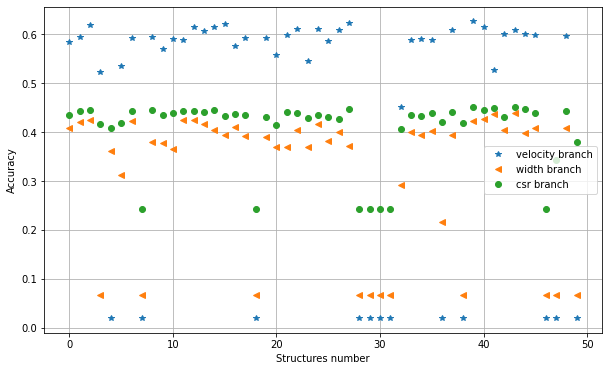

In [2]:
optuna_dir = 'models/'
df_optuna = pd.read_csv(optuna_dir+ 'optuna_study.csv')
print(df_optuna.columns)

fig = plt.figure(figsize=(10,6))
plt.plot(df_optuna.number, df_optuna.values_0, '*', label = 'velocity branch')
plt.plot(df_optuna.number, df_optuna.values_1, '<', label = 'width branch')
plt.plot(df_optuna.number, df_optuna.values_2, 'o', label = 'csr branch')
plt.legend()
plt.xlabel('Structures number')
plt.ylabel('Accuracy')
plt.grid()
fig.show()

In [6]:
prediction_times = pd.read_csv('models/time_to_predict_meanGPU.csv')

In [7]:
prediction_times.head()

,Unnamed: 0,0
0,0,11.221461
1,1,8.051812
2,2,12.386911
3,3,11.198028
4,4,10.866088


In [8]:
model = tf.keras.models.load_model('models/' + f'_{14}.h5')

2022-02-18 02:13:09.785770: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-18 02:13:10.276375: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-18 02:13:10.276567: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-18 02:13:10.305253: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-18 02:13:10.305535: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from S

In [9]:
model.summary()

Model: "Doppler_processing_staggered"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 158, 1)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 144, 2)       32          ['input_1[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 154, 2)       12          ['input_1[0][0]']                
                                                                                                  
 conv1d_2 (Conv1D)              (None, 149, 15)      165         ['input_1[0][0]']                
                                                                       

In [10]:
df_optuna.head(15)

,Unnamed: 0,number,values_0,values_1,values_2,values_3,datetime_start,datetime_complete,duration,params_filters_csr_0,...,params_units_vel_0,params_units_vel_1,params_units_vel_2,params_units_vel_3,params_units_width_0,params_units_width_1,params_units_width_2,params_units_width_3,system_attrs_nsga2:generation,state
0,0,0,0.585226,0.408570,0.435354,0.476383,2022-02-13 00:37:13.894109,2022-02-13 01:55:26.349710,0 days 01:18:12.455601,2,...,60,NaN,NaN,NaN,40,NaN,NaN,NaN,0,COMPLETE
1,1,1,0.594693,0.419780,0.443287,0.485920,2022-02-13 01:55:26.350739,2022-02-13 02:33:26.044630,0 days 00:37:59.693891,10,...,30,50.0,40.0,NaN,40,30.0,50.0,NaN,0,COMPLETE
2,2,2,0.619916,0.424547,0.444713,0.496392,2022-02-13 02:33:26.045248,2022-02-13 04:00:34.199647,0 days 01:27:08.154399,5,...,30,60.0,30.0,NaN,40,50.0,40.0,NaN,0,COMPLETE
3,3,3,0.522959,0.066614,0.416090,0.335221,2022-02-13 04:00:34.200283,2022-02-13 04:10:23.202868,0 days 00:09:49.002585,2,...,30,40.0,30.0,40.0,50,40.0,60.0,30.0,0,COMPLETE
4,4,4,0.020144,0.361611,0.408373,0.263376,2022-02-13 04:10:23.203613,2022-02-13 04:20:35.811782,0 days 00:10:12.608169,2,...,50,30.0,50.0,NaN,50,60.0,60.0,NaN,0,COMPLETE
5,5,5,0.534630,0.312022,0.419036,0.421896,2022-02-13 04:20:35.812410,2022-02-13 04:32:13.247875,0 days 00:11:37.435465,10,...,30,NaN,NaN,NaN,40,NaN,NaN,NaN,0,COMPLETE
6,6,6,0.593054,0.422104,0.442394,0.485850,2022-02-13 04:32:13.248677,2022-02-13 07:21:38.765745,0 days 02:49:25.517068,15,...,30,60.0,NaN,NaN,30,30.0,NaN,NaN,0,COMPLETE
7,7,7,0.020074,0.066571,0.241905,0.109516,2022-02-13 07:21:38.766429,2022-02-13 07:36:03.326457,0 days 00:14:24.560028,15,...,30,NaN,NaN,NaN,50,NaN,NaN,NaN,0,COMPLETE
8,8,8,0.594407,0.379006,0.444705,0.472706,2022-02-13 07:36:03.327092,2022-02-13 08:20:38.533461,0 days 00:44:35.206369,15,...,60,NaN,NaN,NaN,50,NaN,NaN,NaN,0,COMPLETE
9,9,9,0.569977,0.378206,0.434243,0.460809,2022-02-13 08:20:38.534079,2022-02-13 10:16:11.170481,0 days 01:55:32.636402,2,...,60,NaN,NaN,NaN,40,NaN,NaN,NaN,0,COMPLETE


In [11]:
print(df_optuna.loc[14])

Unnamed: 0                                               14
number                                                   14
values_0                                           0.615368
values_1                                           0.404085
values_2                                           0.445682
values_3                                           0.488378
datetime_start                   2022-02-13 14:24:55.103162
datetime_complete                2022-02-13 15:24:06.273683
duration                             0 days 00:59:11.170521
params_filters_csr_0                                     15
params_filters_csr_1                                    5.0
params_filters_csr_2                                    NaN
params_filters_csr_3                                    NaN
params_filters_vel_0                                      2
params_filters_vel_1                                   15.0
params_filters_vel_2                                    NaN
params_filters_vel_3                    

In [4]:
trial_14_H = pd.read_csv('models/_14.csv')

In [5]:
trial_14_H.head()

,Unnamed: 0,loss,velocity_output_loss,width_output_loss,csr_output_loss,velocity_output_accuracy,width_output_accuracy,csr_output_accuracy,val_loss,val_velocity_output_loss,val_width_output_loss,val_csr_output_loss,val_velocity_output_accuracy,val_width_output_accuracy,val_csr_output_accuracy
0,0,5.718602,1.500510,2.545785,1.672296,0.483573,0.125105,0.386989,5.264656,1.302099,2.415285,1.547277,0.533899,0.164208,0.407078
1,1,5.044921,1.258145,2.262133,1.524640,0.549402,0.201911,0.413049,4.784105,1.218174,2.062213,1.503722,0.563048,0.252171,0.418450
2,2,4.687358,1.202105,1.988142,1.497105,0.566529,0.272290,0.419560,4.610454,1.178687,1.944938,1.486833,0.573732,0.288279,0.423416
3,3,4.571309,1.167257,1.923304,1.480742,0.577122,0.294426,0.423229,4.528140,1.156429,1.899314,1.472403,0.581224,0.302356,0.424332
4,4,4.491282,1.147212,1.874811,1.469257,0.583150,0.310333,0.425759,4.446563,1.136383,1.846706,1.463473,0.586668,0.318074,0.427154
